# ML Model Development - VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/RP_Models_Y4S2/cucumber/function2/FinalDatasetv2.0.zip

Streaming output truncated to the last 5000 lines.
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (48)_1.jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (480).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (481).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (482).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (483).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (484).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (485).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (486).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (487).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (488).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot (489).jpg  
  inflating: FinalDatasetv2.0/Belly Rot/aug_rot_90_flip_1_Belly Rot 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [ ]:
# Define path to dataset directory
dataset_dir = "/content/FinalDatasetv2.0/"

# Define image size for resizing
image_size = (224, 224)  # Use 224x224 for VGG16

# Define the number of classes
num_classes = len(os.listdir(dataset_dir))

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to [0, 1]
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  # Added shear range
    zoom_range=0.2,  # Added zoom range
    horizontal_flip=True,
    validation_split=0.2
)

# Load the pre-trained model (VGG16)
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(*image_size, 3)
)

# Add custom layers for classification with dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)  # Reduced dense layer size
x = Dropout(0.5)(x)  # Increased dropout rate
predictions = Dense(num_classes, activation="softmax")(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Print a summary of the model architecture
model.summary()

# Create data generators for training and validation
batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)
valid_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Define a model checkpoint to save the best model in ".h5" format
checkpoint = ModelCheckpoint("/content/drive/MyDrive/RP_Models_Y4S2/cucumber/function2/best_model.h5", save_best_only=True, verbose=1)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with increased epochs
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stopping]  # Save the best model and early stopping
)

# Load the best model for evaluation
best_model = keras.models.load_model("/content/drive/MyDrive/RP_Models_Y4S2/cucumber/function2/best_model.h5")

# Evaluate the model on the validation dataset
valid_generator.reset()
valid_loss, valid_accuracy = best_model.evaluate(valid_generator)

# Evaluate the model on the test dataset
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)
test_loss, test_accuracy = best_model.evaluate(test_generator)

print(f"Validation Loss: {valid_loss:.4f}")
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


58889256/58889256 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


203/203 [==============================] - 344s 2s/step - loss: 0.6969 - accuracy: 0.5379 - val_loss: 0.6913 - val_accuracy: 0.5618
Epoch 2/10
203/203 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5147
Epoch 2: val_loss did not improve from 0.69128
203/203 [==============================] - 298s 1s/step - loss: 0.6913 - accuracy: 0.5147 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
203/203 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5000
Epoch 3: val_loss did not improve from 0.69128
203/203 [==============================] - 293s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
203/203 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.4926
Epoch 4: val_loss did not improve from 0.69128
51/51 [==============================] - 60s 1s/step - loss: 0.6913 - accuracy: 0.5507
Found 1618 images belonging to 2 classes.
51/51 [==============================] - 53s 1

###  Plots for accuracy and loss curves

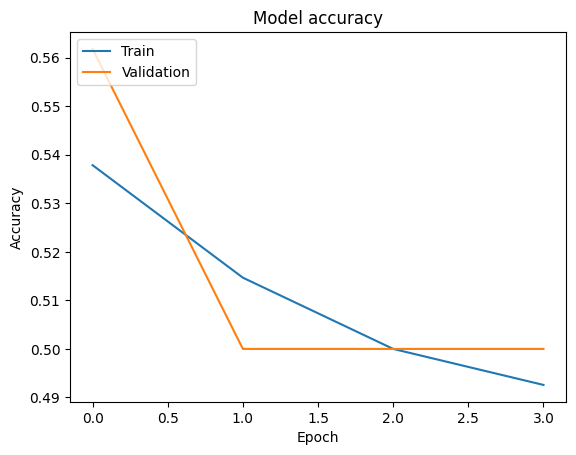

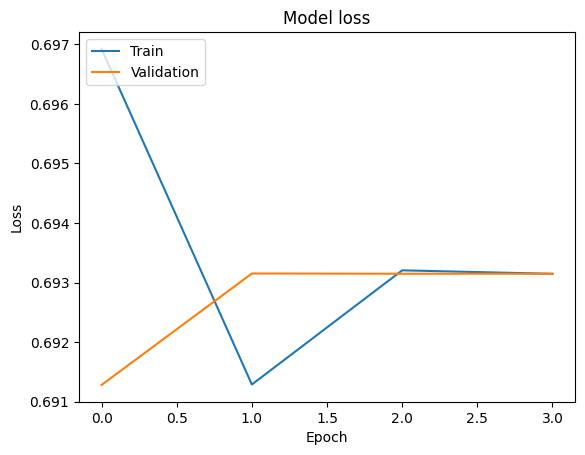

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## VGG16 Model Evaluation

51/51 [==============================] - 55s 1s/step - loss: 0.6913 - accuracy: 0.5525
Found 1618 images belonging to 2 classes.
51/51 [==============================] - 56s 1s/step - loss: 0.6913 - accuracy: 0.5606
Validation Loss (epoch 3): 0.6913
Validation Accuracy (epoch 3): 55.25%
Test Loss (epoch 3): 0.6913
Test Accuracy (epoch 3): 56.06%


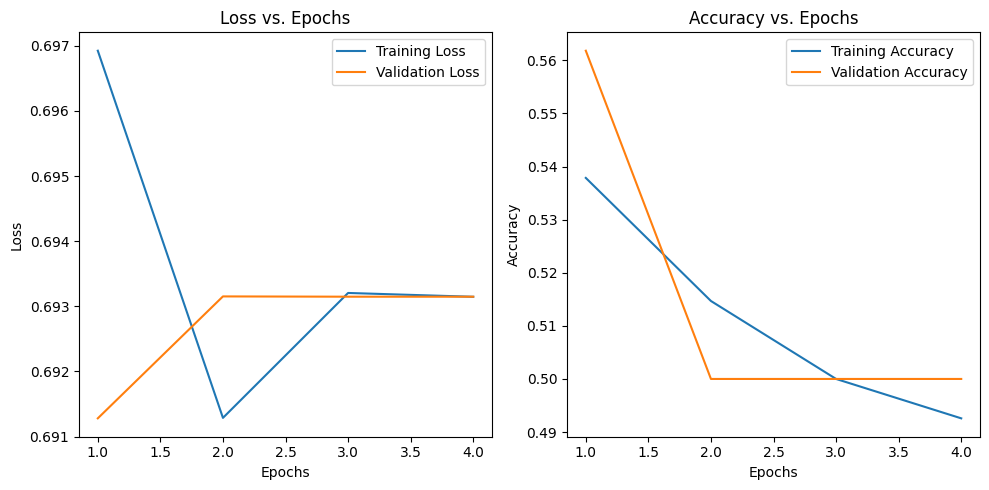

In [ ]:
# Evaluate the model after epoch 3
best_model = keras.models.load_model("/content/drive/MyDrive/RP_Models_Y4S2/cucumber/function2/best_model.h5")

# Evaluate the model on the validation dataset (after epoch 3)
valid_generator.reset()
valid_loss, valid_accuracy = best_model.evaluate(valid_generator)

# Evaluate the model on the test dataset (after epoch 3)
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)
test_loss, test_accuracy = best_model.evaluate(test_generator)

print(f"Validation Loss (epoch 3): {valid_loss:.4f}")
print(f"Validation Accuracy (epoch 3): {valid_accuracy * 100:.2f}%")
print(f"Test Loss (epoch 3): {test_loss:.4f}")
print(f"Test Accuracy (epoch 3): {test_accuracy * 100:.2f}%")

# Extract the history for plotting
import matplotlib.pyplot as plt

# Use 'history' from the training process to access loss and accuracy values
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(valid_loss) + 1), valid_loss, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(valid_accuracy) + 1), valid_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get the true labels for the validation dataset
true_labels = valid_generator.classes

# Generate predictions for the validation dataset using the best model
valid_generator.reset()
predicted_probabilities = best_model.predict(valid_generator)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Extract TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Get class names
class_names = list(valid_generator.class_indices.keys())

# Print the confusion matrix, TP, TN, FP, FN, and classification report
print("Confusion Matrix:")
print(cm)

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

print("\nClass Names:")
print(class_names)

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(report)


51/51 [==============================] - 53s 1s/step
Confusion Matrix:
[[731  78]
 [740  69]]
True Positives (TP): 69
True Negatives (TN): 731
False Positives (FP): 78
False Negatives (FN): 740

Class Names:
['Belly Rot', 'Fresh Cucumber']

Classification Report:
                precision    recall  f1-score   support

     Belly Rot       0.50      0.90      0.64       809
Fresh Cucumber       0.47      0.09      0.14       809

      accuracy                           0.49      1618
     macro avg       0.48      0.49      0.39      1618
  weighted avg       0.48      0.49      0.39      1618

